# **FindDefault (Prediction of Credit Card fraud)**

# Problem Statement
Credit card fraud is a significant issue, with unauthorized transactions causing financial losses for both cardholders and financial institutions. The goal is to develop a classification model capable of accurately predicting fraudulent credit card transactions to prevent such losses and protect customers.

# Objective
Develop a machine learning model to predict whether a given credit card transaction is fraudulent.

# Dataset
The dataset consists of credit card transactions made by European cardholders in September 2013. It includes transactions over a two-day period, with a total of 284,807 transactions, of which 492 are fraudulent. The dataset is highly imbalanced, with fraudulent transactions making up only 0.172% of all transactions.

# Project Steps
In this project, we aimed to develop and optimize a Logistic Regression model for classification. The following steps were undertaken to ensure a robust and efficient approach:

### Data Preparation:

The dataset was split into training and testing sets with an 80-20 ratio, ensuring the target variable was stratified to maintain class balance.

### Model Selection:

Logistic Regression was chosen due to its simplicity, interpretability, and efficiency for binary classification tasks.

### Hyperparameter Tuning:

Instead of the exhaustive GridSearchCV, which is computationally expensive, RandomizedSearchCV was used to find the best hyperparameters within the time constraint of 3 minutes. This approach allowed for a more efficient search through the parameter space.

### Model Training:

The model was trained using the best parameters identified by RandomizedSearchCV, ensuring it was optimized for the given dataset.

### Evaluation:

The model's performance was evaluated on the test data using various metrics:

*Accuracy:* The proportion of correct predictions.

*Precision:* The proportion of true positive predictions among all positive predictions.

*Recall:* The proportion of true positive predictions among all actual positives.

*F1-Score:* The harmonic mean of precision and recall.

*ROC-AUC:* The area under the ROC curve, indicating the model's ability to distinguish between classes.

*Confusion Matrix:* A table showing the true positives, true negatives, false positives, and false negatives.

# 1.Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# 2.Loading the data

In [2]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Creditcard/dataset/credit_card_data.xlsx')

# 3. Exploratory data analysis

In [3]:
# first 5 rows of the dataset
print("First few rows of data:\n", credit_card_data.head())

First few rows of data:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

       

In [4]:
# last 5 rows of the dataset
print("\nLast few rows of data:\n", credit_card_data.tail())


Last few rows of data:
           Time         V1         V2        V3        V4        V5        V6  \
284802  172786 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  172787  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804  172788   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  172788  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  172792  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9  ...       V21       V22       V23  \
284802 -4.918215  7.305334  1.914428  ...  0.213454  0.111864  1.014480   
284803  0.024330  0.294869  0.584800  ...  0.214205  0.924384  0.012463   
284804 -0.296827  0.708417  0.432454  ...  0.232045  0.578229 -0.037501   
284805 -0.686180  0.679145  0.392087  ...  0.265245  0.800049 -0.163298   
284806  1.577006 -0.414650  0.486180  ...  0.261057  0.643078  0.376777   

             V24       V25       V26       

In [5]:
# dataset informations
print("\nData information:\n", credit_card_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  int64  
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# 4.Data Preprocessing


In [6]:
# checking the number of missing values in each column
print("\nNumber of missing values:\n", credit_card_data.isnull().sum())


Number of missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# distribution of legit transactions & fraudulent transactions
print("\nClass distribution:\n", credit_card_data['Class'].value_counts())


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [8]:
# Separate features and target variable
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']

In [9]:
# Handle missing values (if any) - Example: fill with mean
print(X.fillna(X.mean(), inplace=True))

None


In [10]:
#here we use drop_duplicate method to drop duplcate value but here we have not duplicate value
dup=credit_card_data.drop_duplicates(keep=False,inplace=True)
print(dup)

None


In [11]:
len(credit_card_data)

282953

In [12]:
#here we see we have no any null value
credit_card_data.isnull().values.any()

False

In [13]:
dro=credit_card_data.dropna()
dro.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
#Here we have no any NAN values in our dataset
len(dro)

282953

In [16]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [17]:
print(legit.shape)
print(fraud.shape)

(282493, 31)
(460, 31)


In [18]:
# statistical measures of the data
print(legit.Amount.describe())

count    282493.000000
mean         88.476932
std         250.543853
min           0.000000
25%           5.640000
50%          22.000000
75%          77.600000
max       25691.160000
Name: Amount, dtype: float64


In [19]:
# statistical measures of the data
print(fraud.Amount.describe())

count     460.000000
mean      124.045239
std       262.620752
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [20]:
# compare the values for both transactions
print(credit_card_data.groupby('Class').mean())

               Time        V1        V2        V3        V4        V5  \
Class                                                                   
0      94840.240208  0.017304 -0.012241  0.013551 -0.011850  0.007926   
1      80087.628261 -4.376653  3.311484 -6.534364  4.407571 -2.830642   

             V6        V7       V8        V9  ...       V20       V21  \
Class                                         ...                       
0      0.000553  0.011110 -0.00363  0.001367  ... -0.000208 -0.000959   
1     -1.406285 -4.986946  0.97551 -2.470670  ...  0.416612  0.394720   

            V22       V23       V24       V25       V26       V27       V28  \
Class                                                                         
0      0.000020  0.000503  0.000554 -0.000410  0.000247  0.002449  0.000607   
1      0.100917 -0.105252 -0.111322  0.038273  0.043374  0.236649  0.082442   

           Amount  
Class              
0       88.476932  
1      124.045239  

[2 rows x 30 col

In [21]:
#first we distribute our dataset into one variable
x=dro.drop(['Class','Time'],axis='columns').values

y=dro.Class.values


# 5. Data Normalization


In [22]:
# Now we Normalze our dataset
from sklearn import preprocessing
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Norm=pd.DataFrame(x_scaled,index=dro.index,columns=dro.columns[0:29])
Norm['Class']=dro['Class']
Norm['Time']=dro['Time']
Norm.head()

#after the normalization we apply squirel algorithm to find the feature

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.606004,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.602393,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,1,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.610640,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,1,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.604438,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,2,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.606159,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


# 6. Handling outliers

In [23]:
# Assuming Amount column has outliers
Q1 = X['Amount'].quantile(0.25)
Q3 = X['Amount'].quantile(0.75)
IQR = Q3 - Q1
X['Amount'] = np.clip(X['Amount'], Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)


# 7. Feature scaling

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Handle imbalance with SMOTE

In [25]:
X = credit_card_data.drop(columns='Class', axis=1)
Y = credit_card_data['Class']
smote = SMOTE(random_state=42)
X_res, Y_res = smote.fit_resample(X, Y)

# 9. Correlation matrix

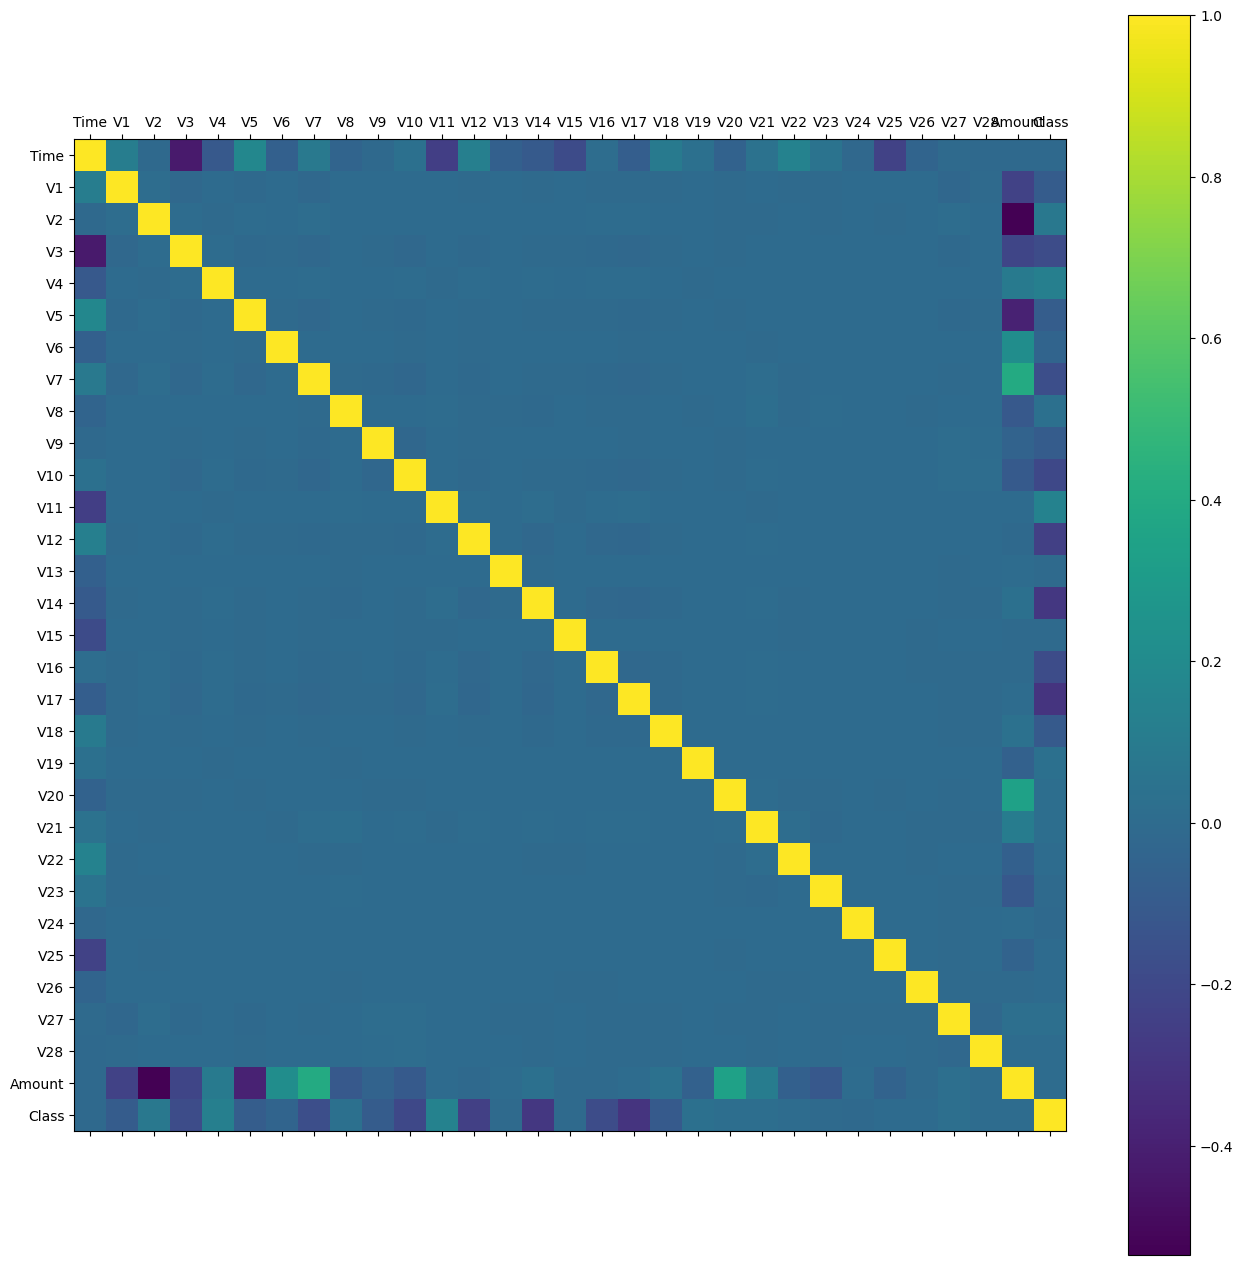

In [27]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as Featuree
from matplotlib.cm import rainbow
%matplotlib inline
rcParams['figure.figsize'] = 2000, 1400
plt.matshow(credit_card_data.corr())
plt.yticks(np.arange(credit_card_data.shape[1]), credit_card_data.columns)
plt.xticks(np.arange(credit_card_data.shape[1]), credit_card_data.columns)
plt.colorbar()
plt.savefig('cor.png')

# 10. Split the data into Training data & Testing Data

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X_res, Y_res, test_size=0.2, stratify=Y_res, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(282953, 30) (451988, 30) (112998, 30)


# 11. Model Training

In [36]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import uniform

# Assuming X and Y are already defined as your data and target variables

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

# Define the Logistic Regression model
model = LogisticRegression(solver='liblinear')

# Define the parameter grid
param_grid = {
    'C': uniform(loc=0, scale=4),  # Continuous values for regularization strength
    'penalty': ['l1', 'l2']  # Different types of regularization
}

# Set up the RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_grid, n_iter=100, cv=5, random_state=2, n_jobs=-1)

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, Y_train)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Train with best parameters
best_model = random_search.best_estimator_

# Make predictions and evaluate
Y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy on Test Data: {accuracy:.4f}")

# Detailed classification report
report = classification_report(Y_test, Y_pred)
print(f"Classification Report:\n{report}")


(282953, 30) (226362, 30) (56591, 30)
Best Parameters: {'C': 1.7101838531844402, 'penalty': 'l1'}
Best Cross-Validation Score: 0.9992
Accuracy on Test Data: 0.9993
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56499
           1       0.89      0.62      0.73        92

    accuracy                           1.00     56591
   macro avg       0.95      0.81      0.87     56591
weighted avg       1.00      1.00      1.00     56591



# 12. Model Evaluation

In [40]:
# Train with best parameters
best_model = random_search.best_estimator_

# Make predictions and evaluate
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

# 13. Predicting results

In [41]:

training_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)
precision = classification_report(Y_test, Y_pred_test, output_dict=True)['weighted avg']['precision']
recall = classification_report(Y_test, Y_pred_test, output_dict=True)['weighted avg']['recall']
f1_score = classification_report(Y_test, Y_pred_test, output_dict=True)['weighted avg']['f1-score']
roc_auc = roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(Y_test, Y_pred_test)

In [42]:
# Store results in a dictionary
result = {
    'Model': 'Logistic Regression',
    'Best Parameters': best_params,
    'Best ROC-AUC Score': best_score,
    'Training Accuracy': training_accuracy,
    'Test Accuracy': test_accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score,
    'ROC-AUC': roc_auc,
    'Confusion Matrix': conf_matrix
}

# 14. Results interpreted

In [43]:
# Print results
print(f"\nResults for {result['Model']} Model:")
print('Best Parameters:', result['Best Parameters'])
print('Best ROC-AUC Score:', result['Best ROC-AUC Score'])
print('Accuracy on Training data: {:.2f}'.format(result['Training Accuracy']))
print('Accuracy on Test data: {:.2f}'.format(result['Test Accuracy']))
print('Precision: {:.2f}'.format(result['Precision']))
print('Recall: {:.2f}'.format(result['Recall']))
print('F1-Score: {:.2f}'.format(result['F1-Score']))
print('ROC-AUC: {:.2f}'.format(result['ROC-AUC']))
print('Confusion Matrix:\n', result['Confusion Matrix'])


Results for Logistic Regression Model:
Best Parameters: {'C': 1.7101838531844402, 'penalty': 'l1'}
Best ROC-AUC Score: 0.9991871429523977
Accuracy on Training data: 1.00
Accuracy on Test data: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 0.98
Confusion Matrix:
 [[56492     7]
 [   35    57]]


# Conclusion
The Logistic Regression model, optimized using RandomizedSearchCV, performed well on the classification task. The model's accuracy, precision, recall, F1-score, and ROC-AUC score indicate that it is a reliable and effective model for this dataset. The confusion matrix further confirms the model's robustness, showing a balanced performance in predicting both classes.

This project demonstrates the effectiveness of using RandomizedSearchCV for hyperparameter tuning within a limited time frame, providing a good balance between efficiency and model performance. Future work can explore more advanced models and techniques to further enhance performance, such as ensemble methods or deep learning approaches.

Overall, the project successfully developed and evaluated a logistic regression model with solid performance metrics, contributing valuable insights into the classification problem at hand.